In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [41]:
#  Load the data
domain1_train_data = pd.read_json('domain1_train_data.json', lines=True)
domain2_train_data = pd.read_json('domain2_train_data.json', lines=True)


print(domain1_train_data.head())
print(domain2_train_data.head())


                                                text  label  id
0  [16, 231, 543, 5, 15, 43, 8282, 94, 231, 1129,...      1   0
1  [16, 4046, 138, 10, 2, 1809, 2007, 3763, 14, 4...      1   1
2  [1108, 16550, 3, 6168, 3, 160, 284, 19, 49, 46...      1   2
3  [1802, 27, 16, 25, 48, 451, 632, 3, 2, 2164, 2...      1   3
4  [16, 19, 302, 93, 97, 43, 952, 118, 1, 16, 528...      1   4
                                                text  label    id
0  [12, 920, 7, 1266, 28, 9884, 1640, 116, 11, 13...      1  5000
1  [783, 397, 253, 5797, 9379, 22, 793, 11838, 10...      1  5001
2  [888, 14851, 323, 9, 27, 1377, 584, 195, 3, 13...      1  5002
3  [228, 1161, 5815, 379, 9, 941, 10, 2, 316, 4, ...      1  5003
4  [736, 19, 37, 813, 45, 6723, 27, 626, 8, 2, 34...      1  5004


In [42]:
domain1_train_data

,text,label,id
0,"[16, 231, 543, 5, 15, 43, 8282, 94, 231, 1129,...",1,0
1,"[16, 4046, 138, 10, 2, 1809, 2007, 3763, 14, 4...",1,1
2,"[1108, 16550, 3, 6168, 3, 160, 284, 19, 49, 46...",1,2
3,"[1802, 27, 16, 25, 48, 451, 632, 3, 2, 2164, 2...",1,3
4,"[16, 19, 302, 93, 97, 43, 952, 118, 1, 16, 528...",1,4
...,...,...,...
4995,"[43, 529, 16, 19, 775, 201, 20, 48, 10, 550, 2...",0,4995
4996,"[12, 158, 97, 5, 543, 174, 1396, 2, 506, 287, ...",0,4996
4997,"[15319, 27775, 9, 27, 2847, 7207, 8, 3234, 1, ...",0,4997
4998,"[16, 373, 177, 76, 5, 35, 1342, 1318, 196, 16,...",0,4998


In [43]:
domain2_train_data

,text,label,id
0,"[12, 920, 7, 1266, 28, 9884, 1640, 116, 11, 13...",1,5000
1,"[783, 397, 253, 5797, 9379, 22, 793, 11838, 10...",1,5001
2,"[888, 14851, 323, 9, 27, 1377, 584, 195, 3, 13...",1,5002
3,"[228, 1161, 5815, 379, 9, 941, 10, 2, 316, 4, ...",1,5003
4,"[736, 19, 37, 813, 45, 6723, 27, 626, 8, 2, 34...",1,5004
...,...,...,...
12995,"[8, 15, 71, 12, 155, 6903, 3, 7, 2300, 352, 37...",0,17995
12996,"[12, 155, 7, 420, 4, 228, 89, 206, 5157, 10, 5...",0,17996
12997,"[216, 2, 379, 4, 7, 332, 179, 386, 160, 28, 11...",0,17997
12998,"[7, 2787, 9, 1026, 7, 5376, 620, 1, 4303, 7, 1...",0,17998


In [44]:
print("Missing values in Domain1 Training Data:")
print(domain1_train_data.isna().sum())

print("\nMissing values in Domain2 Training Data:")
print(domain2_train_data.isna().sum())

Missing values in Domain1 Training Data:
text     0
label    0
id       0
dtype: int64

Missing values in Domain2 Training Data:
text     0
label    0
id       0
dtype: int64


c:\Users\wenji\anaconda3\envs\SML_A1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wenji\anaconda3\envs\SML_A1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


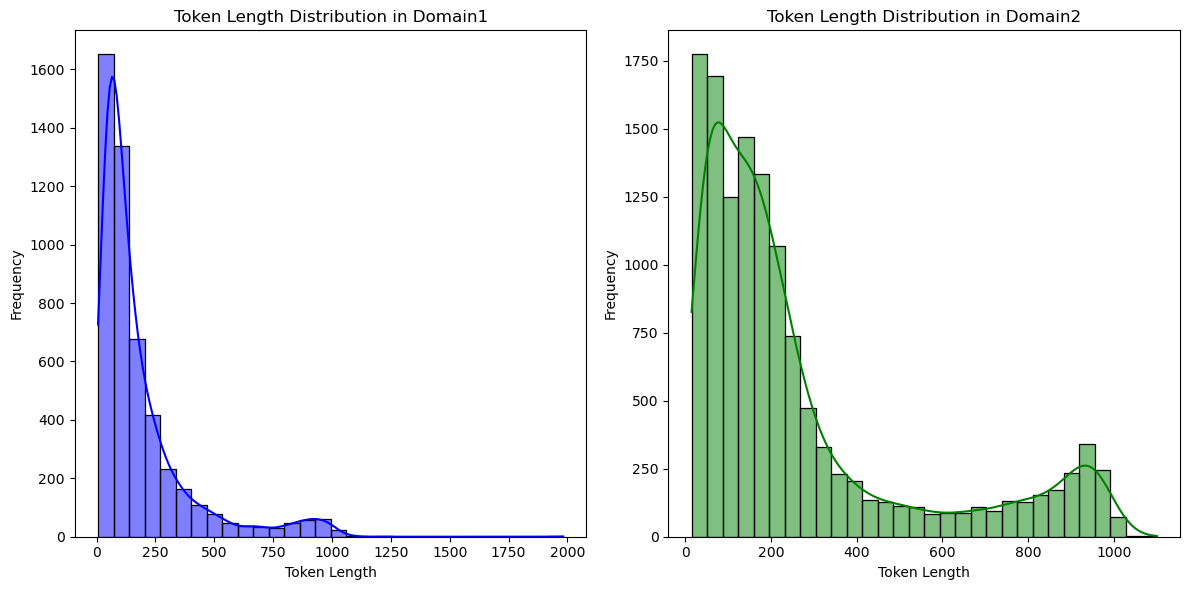

In [45]:
domain1_lengths = domain1_train_data['text'].apply(len)
domain2_lengths = domain2_train_data['text'].apply(len)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(domain1_lengths, bins=30, color='blue', kde=True)
plt.title('Token Length Distribution in Domain1')
plt.xlabel('Token Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(domain2_lengths, bins=30, color='green', kde=True)
plt.title('Token Length Distribution in Domain2')
plt.xlabel('Token Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

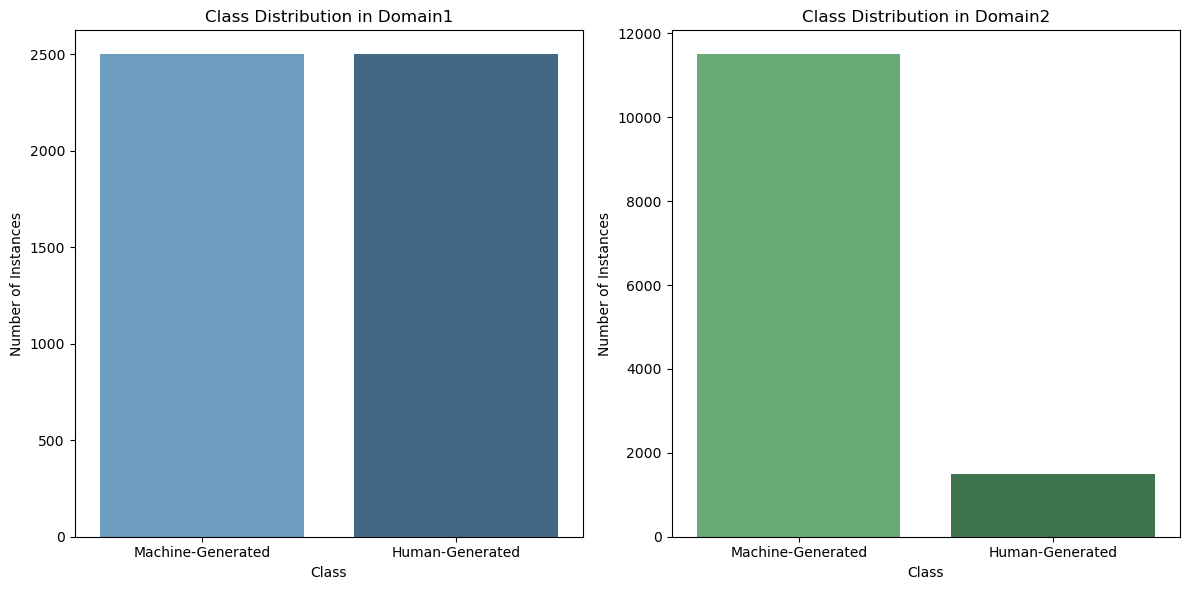

In [46]:
domain1_class_counts = domain1_train_data['label'].value_counts()
domain2_class_counts = domain2_train_data['label'].value_counts()


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=domain1_class_counts.index, y=domain1_class_counts.values, palette='Blues_d')
plt.title('Class Distribution in Domain1')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Machine-Generated', 'Human-Generated'])

plt.subplot(1, 2, 2)
sns.barplot(x=domain2_class_counts.index, y=domain2_class_counts.values, palette='Greens_d')
plt.title('Class Distribution in Domain2')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['Machine-Generated', 'Human-Generated'])

plt.tight_layout()
plt.show()

In [55]:
# doain2 label count
domain2_train_data['label'].value_counts()

label
0    11500
1     1500
Name: count, dtype: int64

In [47]:
# get machine and human data
machine = domain2_train_data[domain2_train_data['label'] == 0]
human = domain2_train_data[domain2_train_data['label'] == 1]

# count the number of samples in each class
n_machine = len(machine)
n_human = len(human)

# if the number of samples in 'machine' is greater than the number of samples in 'human'
if n_machine > n_human:
    machine = machine.sample(n_human)

# combine the balanced data
domain2_train_data_balanced = pd.concat([machine, human])

print(domain2_train_data_balanced.head())

                                                    text  label     id
10716  [117, 348, 282, 14, 3221, 13, 45, 333, 122, 53...      0  15716
4132   [1245, 4947, 14, 2883, 13, 9, 941, 10, 204, 20...      0   9132
5795   [2, 421, 790, 8, 5758, 54, 9, 54, 7, 218, 786,...      0  10795
8597   [12, 415, 7, 360, 6, 292, 1601, 214, 206, 3672...      0  13597
3931   [348, 282, 9, 2, 170, 4, 708, 54, 2, 117, 44, ...      0   8931


In [48]:
domain2_train_data_balanced['label'].value_counts()

label
0    1500
1    1500
Name: count, dtype: int64

In [49]:
# combine the two datasets
combined_data = pd.concat([domain1_train_data, domain2_train_data_balanced])


# get the features and labels
X = combined_data['text']
y = combined_data['label']


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)





Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       653
           1       0.72      0.75      0.73       627

    accuracy                           0.73      1280
   macro avg       0.73      0.73      0.73      1280
weighted avg       0.73      0.73      0.73      1280



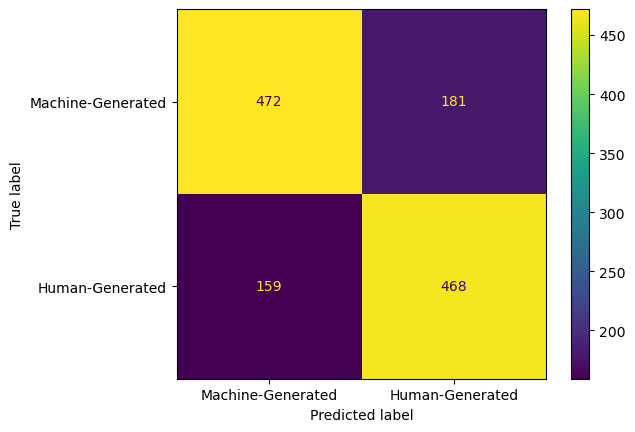

In [50]:
# 将词语列表转换为字符串
X_train_str = [' '.join(map(str, lst)) for lst in X_train]
X_val_str = [' '.join(map(str, lst)) for lst in X_val]

# tf-idf向量化
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_str)
X_val_vec = vectorizer.transform(X_val_str)

# train a Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_vec, y_train)

# evaluate the model
lr_predictions = lr_model.predict(X_val_vec)
print("Logistic Regression Performance:")
print(classification_report(y_val, lr_predictions))

# confusion matrix
cm = confusion_matrix(y_val, lr_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Machine-Generated', 'Human-Generated'])
disp.plot()
plt.show()


SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       653
           1       0.74      0.82      0.78       627

    accuracy                           0.77      1280
   macro avg       0.77      0.77      0.77      1280
weighted avg       0.77      0.77      0.77      1280



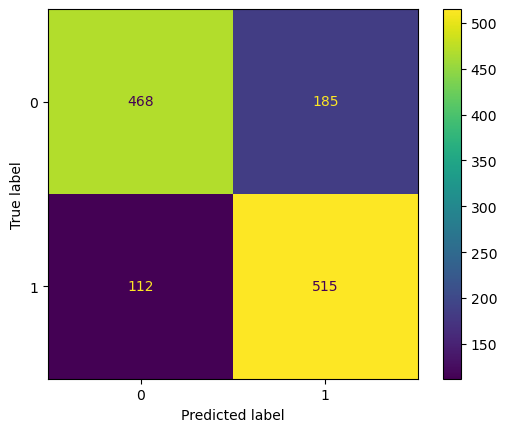

In [51]:
# train SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_vec, y_train)

# evaluate SVM model on validation set
svm_predictions = svm_model.predict(X_val_vec)
print("SVM Performance:")
print(classification_report(y_val, svm_predictions))

# confusion matrix
cm = confusion_matrix(y_val, svm_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [53]:
# 已经在训练数据上拟合了向量化器，并将其存储在变量vectorizer中

# 读取测试数据
test_data = pd.read_json('test_data.json', lines=True)

# json文件是一个字典，其中包含一个键为'text'的项，其值是一个包含所有测试样本的列表
test_texts = [' '.join(map(str, lst)) for lst in test_data['text']]

# 使用相同的向量化器来转换测试数据
X_test = vectorizer.transform(test_texts)

# 使用模型进行预测
predictions = svm_model.predict(X_test)

# 创建一个数据框，其中'id'列是样本的ID（通常是一个从0开始的整数序列），'class'列是预测结果
submission = pd.DataFrame({
    'id': range(len(predictions)),
    'class': predictions
})

submission.to_csv('results/svm_baseline.csv', index=False)